In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
# from keras.models import Sequential
# from keras.layers import Dense
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
train_data = pd.read_csv("train.csv")
oil_data = pd.read_csv("oil.csv")
stores_data = pd.read_csv("stores.csv")
holi_event_data = pd.read_csv("holidays_events.csv")

In [5]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
holi_event_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
train_data.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [9]:

merged_df = pd.merge(train_data,oil_data,on="date",how="left").merge(right=stores_data,on="store_nbr",how="left").merge(right=holi_event_data,on="date",how="left")
merged_df.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico,cluster
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.099196e+06,3.054348e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,6.801587e+01,8.481481e+00
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,2.569134e+01,4.649735e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.641000e+01,4.000000e+00
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,5.343000e+01,8.500000e+00
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,9.581000e+01,1.300000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01


In [10]:
merged_df.isnull().sum()


id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
dcoilwtico      955152
city                 0
state                0
type_x               0
cluster              0
type_y         2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64

In [11]:
merged_df['dcoilwtico']= merged_df['dcoilwtico'].fillna(0)
merged_df.query('date=="2016-04-16"')

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
2161566,2134836,2016-04-16,1,AUTOMOTIVE,6.000,0,0.0,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False
2161567,2134837,2016-04-16,1,BABY CARE,0.000,0,0.0,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False
2161568,2134838,2016-04-16,1,BEAUTY,4.000,0,0.0,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False
2161569,2134839,2016-04-16,1,BEVERAGES,2073.000,5,0.0,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False
2161570,2134840,2016-04-16,1,BOOKS,0.000,0,0.0,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163343,2136613,2016-04-16,9,POULTRY,668.427,2,0.0,Quito,Pichincha,B,6,Event,National,Ecuador,Terremoto Manabi,False
2163344,2136614,2016-04-16,9,PREPARED FOODS,135.720,0,0.0,Quito,Pichincha,B,6,Event,National,Ecuador,Terremoto Manabi,False
2163345,2136615,2016-04-16,9,PRODUCE,1496.493,0,0.0,Quito,Pichincha,B,6,Event,National,Ecuador,Terremoto Manabi,False
2163346,2136616,2016-04-16,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,0.0,Quito,Pichincha,B,6,Event,National,Ecuador,Terremoto Manabi,False


In [12]:
merged_df = merged_df.fillna("No holiday")
merged_df.loc[merged_df.transferred == True,"type_y"] = "No holiday"

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   dcoilwtico   float64
 7   city         object 
 8   state        object 
 9   type_x       object 
 10  cluster      int64  
 11  type_y       object 
 12  locale       object 
 13  locale_name  object 
 14  description  object 
 15  transferred  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 396.1+ MB


In [14]:
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3054348.0,1.504277e+06,866261.012008,0.0,754676.75,1507571.50,2255120.250,3000887.00
store_nbr,3054348.0,2.750000e+01,15.585787,1.0,14.00,27.50,41.000,54.00
sales,3054348.0,3.590209e+02,1107.285897,0.0,0.00,11.00,196.011,124717.00
onpromotion,3054348.0,2.617480e+00,12.254939,0.0,0.00,0.00,0.000,741.00
dcoilwtico,3054348.0,4.674603e+01,38.051512,0.0,0.00,47.02,91.530,110.62
cluster,3054348.0,8.481481e+00,4.649735,1.0,4.00,8.50,13.000,17.00


In [15]:
merged_df.query('type_y=="No holiday"')

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
1782,1782,2013-01-02,1,AUTOMOTIVE,2.000,0,93.14,Quito,Pichincha,D,13,No holiday,No holiday,No holiday,No holiday,No holiday
1783,1783,2013-01-02,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,No holiday,No holiday,No holiday,No holiday,No holiday
1784,1784,2013-01-02,1,BEAUTY,2.000,0,93.14,Quito,Pichincha,D,13,No holiday,No holiday,No holiday,No holiday,No holiday
1785,1785,2013-01-02,1,BEVERAGES,1091.000,0,93.14,Quito,Pichincha,D,13,No holiday,No holiday,No holiday,No holiday,No holiday
1786,1786,2013-01-02,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,No holiday,No holiday,No holiday,No holiday,No holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052561,2999101,2017-08-14,9,POULTRY,283.429,0,47.59,Quito,Pichincha,B,6,No holiday,No holiday,No holiday,No holiday,No holiday
3052562,2999102,2017-08-14,9,PREPARED FOODS,114.120,0,47.59,Quito,Pichincha,B,6,No holiday,No holiday,No holiday,No holiday,No holiday
3052563,2999103,2017-08-14,9,PRODUCE,1348.425,7,47.59,Quito,Pichincha,B,6,No holiday,No holiday,No holiday,No holiday,No holiday
3052564,2999104,2017-08-14,9,SCHOOL AND OFFICE SUPPLIES,182.000,11,47.59,Quito,Pichincha,B,6,No holiday,No holiday,No holiday,No holiday,No holiday


Brief EDA

In [16]:
# https://www.kaggle.com/competitions/store-sales-time-series-forecasting/code

In [17]:
merged_df.tail()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [18]:
enc = OrdinalEncoder()

In [19]:
enc.fit(merged_df[["city","state"]])

OrdinalEncoder()

In [20]:
merged_df[["city","state"]] = enc.transform(merged_df[["city","state"]])

In [21]:
merged_df['transferred'] =  merged_df['transferred'].apply(lambda x: 1 if x == True else 0)

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   dcoilwtico   float64
 7   city         float64
 8   state        float64
 9   type_x       object 
 10  cluster      int64  
 11  type_y       object 
 12  locale       object 
 13  locale_name  object 
 14  description  object 
 15  transferred  int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 396.1+ MB


In [23]:
df_corr = merged_df[['store_nbr','sales','onpromotion','dcoilwtico','city','state','cluster','transferred']].corr('pearson')

[Text(0.5, 0, 'store_nbr'),
 Text(1.5, 0, 'sales'),
 Text(2.5, 0, 'onpromotion'),
 Text(3.5, 0, 'dcoilwtico'),
 Text(4.5, 0, 'city'),
 Text(5.5, 0, 'state'),
 Text(6.5, 0, 'cluster'),
 Text(7.5, 0, 'transferred')]

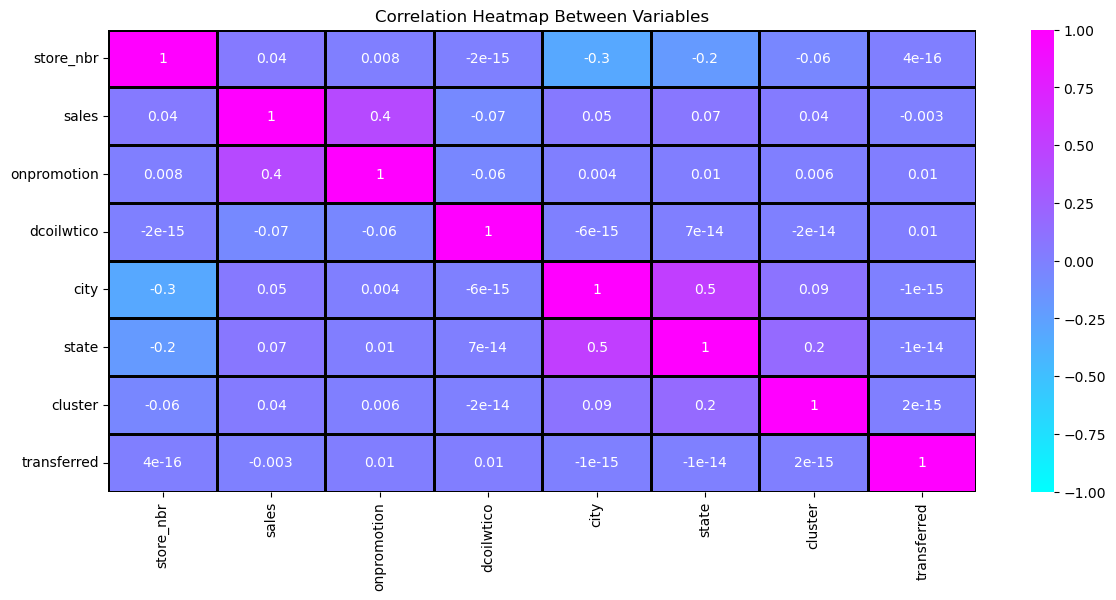

In [24]:
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(df_corr, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="cool", linewidths=1, linecolor="black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [25]:
x = merged_df[['onpromotion','city','state','cluster',]].values
y = merged_df[['sales']].values
model = LinearRegression()
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2)
model = GradientBoostingRegressor( )
model.fit(xtrain,ytrain)

C:\Users\mauli\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [29]:
test = pd.read_csv("test (1).csv")


In [30]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [31]:
merged_test = pd.merge(left=test,right=oil_data,on="date",how="left").merge(right=stores_data,on="store_nbr",how="left").merge(right=holi_event_data,on="date",how="left")

In [32]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           28512 non-null  int64  
 1   date         28512 non-null  object 
 2   store_nbr    28512 non-null  int64  
 3   family       28512 non-null  object 
 4   onpromotion  28512 non-null  int64  
 5   dcoilwtico   21384 non-null  float64
 6   city         28512 non-null  object 
 7   state        28512 non-null  object 
 8   type_x       28512 non-null  object 
 9   cluster      28512 non-null  int64  
 10  type_y       1782 non-null   object 
 11  locale       1782 non-null   object 
 12  locale_name  1782 non-null   object 
 13  description  1782 non-null   object 
 14  transferred  1782 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.5+ MB


In [33]:
merged_test['transferred'] =  merged_test['transferred'].apply(lambda x: 1 if x == True else 0)

In [34]:
merged_test.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
dcoilwtico      7128
city               0
state              0
type_x             0
cluster            0
type_y         26730
locale         26730
locale_name    26730
description    26730
transferred        0
dtype: int64

In [35]:
merged_test[["city","state"]] = enc.transform(merged_test[["city","state"]])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   dcoilwtico   float64
 7   city         float64
 8   state        float64
 9   type_x       object 
 10  cluster      int64  
 11  type_y       object 
 12  locale       object 
 13  locale_name  object 
 14  description  object 
 15  transferred  int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 396.1+ MB


In [36]:
y_pred = model.predict(merged_test[['onpromotion','city','state','cluster']].values)
# mse = mean_squared_error(ytest,y_pred)
# print("MSE: %.2f" % mse)


In [37]:
merged_test['sales'] = y_pred

In [38]:
merged_test.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,18.0,12.0,D,13,NaN,NaN,NaN,NaN,0,178.311795
1,3000889,2017-08-16,1,BABY CARE,0,46.8,18.0,12.0,D,13,NaN,NaN,NaN,NaN,0,178.311795
2,3000890,2017-08-16,1,BEAUTY,2,46.8,18.0,12.0,D,13,NaN,NaN,NaN,NaN,0,729.897456
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,18.0,12.0,D,13,NaN,NaN,NaN,NaN,0,2115.135906
4,3000892,2017-08-16,1,BOOKS,0,46.8,18.0,12.0,D,13,NaN,NaN,NaN,NaN,0,178.311795


In [39]:
outp = merged_test[["id","sales"]]

In [40]:
outp.to_csv("sample_submission (2).csv",index=False)